In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn tensorflow keras xgboost hyperopt shap scikeras imbalanced-learn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LassoCV
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import shap
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64",

In [ ]:
file_path = '/content/PCOS_data_without_infertility.xlsx'
data = pd.read_excel(file_path,sheet_name="Full_new")

In [ ]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
data.shape

(541, 45)

In [ ]:
data = data.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed: 44'])

In [ ]:
data.isnull().sum()

,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0


In [ ]:
data['Cycle(R/I)']

,Cycle(R/I)
0,2
1,2
2,2
3,2
4,2
...,...
536,2
537,2
538,2
539,4


In [ ]:
print(data['Cycle(R/I)'].unique())

[2 4 5]


In [ ]:
# One-hot encode the 'Cycle(R/I)' column
cycle_encoded = pd.get_dummies(data['Cycle(R/I)'], prefix='Cycle')
data = pd.concat([data.drop(columns=['Cycle(R/I)']), cycle_encoded], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle length(days)      541 non-null    int64  
 10  Marraige Status (Yrs)   540 non-null    float64
 11  Pregnant(Y/N)           541 non-null    int64  
 12  No. of aborptions       541 non-null    int64  
 13    I   beta-HCG(mIU/mL)  541 non-null    float64
 14  II    beta-HCG(mIU/mL)  541 non-null    ob

In [ ]:
# Fill missing values for 'Marraige Status (Yrs)' and 'Fast food (Y/N)'
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(), inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(), inplace=True)

In [ ]:
data.isnull().sum()

,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle length(days),0


In [ ]:
# Convert categorical columns 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
# 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Reg.Exercise(Y/N)' to numerical
categorical_cols = ['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
                    'Pimples(Y/N)', 'Reg.Exercise(Y/N)']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
# Convert 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', and 'AMH(ng/mL)' columns to numerical, filling in NaN with median values
data['  I   beta-HCG(mIU/mL)'] = pd.to_numeric(data['  I   beta-HCG(mIU/mL)'], errors='coerce')
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce')
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'], errors='coerce')
data['  I   beta-HCG(mIU/mL)'].fillna(data['  I   beta-HCG(mIU/mL)'].median(), inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(), inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(), inplace=True)

In [ ]:
data.corr()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Cycle_2,Cycle_4,Cycle_5
PCOS (Y/N),1.000000,-0.168513,0.211938,0.068254,0.199534,0.036433,0.091821,0.036928,0.087170,-0.178480,...,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648,-0.400475,0.395372,0.061712
Age (yrs),-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,-0.021558,0.055918,...,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238,0.083112,-0.076842,-0.067110
Weight (Kg),0.211938,-0.029734,1.000000,0.420098,0.901675,0.072682,0.019983,0.043614,0.009594,-0.002308,...,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100,-0.199339,0.195113,0.048285
Height(Cm),0.068254,-0.119819,0.420098,1.000000,-0.006878,0.040825,-0.074339,-0.029459,0.024378,0.009536,...,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035,0.020324,-0.026198,0.060789
BMI,0.199534,0.021261,0.901675,-0.006878,1.000000,0.061939,0.050529,0.061905,0.003512,-0.006232,...,0.069491,0.139975,0.142886,0.104204,-0.011610,-0.111522,0.009349,-0.232802,0.231150,0.022179
Blood Group,0.036433,-0.010954,0.072682,0.040825,0.061939,1.000000,0.047572,-0.023766,-0.001759,-0.006290,...,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335,-0.125173,0.127230,-0.018771
Pulse rate(bpm),0.091821,0.045831,0.019983,-0.074339,0.050529,0.047572,1.000000,0.303804,-0.052048,0.006423,...,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241,-0.102036,0.103409,-0.012131
RR (breaths/min),0.036928,0.087382,0.043614,-0.029459,0.061905,-0.023766,0.303804,1.000000,-0.040487,0.005004,...,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930,-0.019924,0.023010,-0.031731
Hb(g/dl),0.087170,-0.021558,0.009594,0.024378,0.003512,-0.001759,-0.052048,-0.040487,1.000000,-0.051927,...,0.053020,0.000606,0.061195,0.072958,0.032617,0.024335,-0.066446,-0.038179,0.040927,-0.027826
Cycle length(days),-0.178480,0.055918,-0.002308,0.009536,-0.006232,-0.006290,0.006423,0.005004,-0.051927,1.000000,...,-0.011904,-0.075775,-0.086826,-0.161263,-0.052308,-0.013944,-0.016577,0.204757,-0.210880,0.059445


In [ ]:
# Handling outliers using RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['PCOS (Y/N)']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])
data_scaled['PCOS (Y/N)'] = data['PCOS (Y/N)']

In [ ]:
# Identify and remove outliers using IQR method
Q1 = data_scaled.quantile(0.25)
Q3 = data_scaled.quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = data_scaled[~((data_scaled < (Q1 - 1.5 * IQR)) | (data_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Separate features and target variable
X = data_no_outliers.drop(columns=['PCOS (Y/N)'])
y = data_no_outliers['PCOS (Y/N)']

In [ ]:
# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Feature selection using SelectKBest with ANOVA F-test and mutual information
anova_selector = SelectKBest(score_func=f_classif, k=20)
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_anova_selected = anova_selector.fit_transform(X_resampled, y_resampled)
X_mutual_info_selected = mutual_info_selector.fit_transform(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10 31 41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Combine the selected features from both methods
anova_selected_features = anova_selector.get_support(indices=True)
mutual_info_selected_features = mutual_info_selector.get_support(indices=True)
combined_selected_features = np.unique(np.concatenate([anova_selected_features, mutual_info_selected_features]))
X_combined = X_resampled.iloc[:, combined_selected_features]
print("Selected Features: ", X.columns[combined_selected_features])

Selected Features:  Index(['Height(Cm) ', 'Blood Group', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'II    beta-HCG(mIU/mL)',
       'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'TSH (mIU/L)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Endometrium (mm)', 'Cycle_2'],
      dtype='object')


In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_combined)

In [ ]:
# Feature selection using Lasso
lasso = LassoCV(cv=5).fit(X_pca, y_resampled)
lasso_selected_features = np.where(lasso.coef_ != 0)[0]
X_lasso_selected = X_pca[:, lasso_selected_features]
print("Lasso Selected Features: ", lasso_selected_features)

Lasso Selected Features:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso_selected, y_resampled, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the deep learning model
def create_deep_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create KerasClassifier
deep_model = KerasClassifier(model=create_deep_model, input_dim=X_train.shape[1], epochs=100, batch_size=32, verbose=0)

# Define the search space for XGBoost
space = {
    'max_depth': hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 1.0),
    'n_estimators': hp.choice('n_estimators', np.arange(50, 300, dtype=int)),
    'gamma': hp.uniform('gamma', 0.01, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0)
}

In [ ]:
# Define the objective function
def objective(params):
    clf = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Run Bayesian optimization
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print("Best Parameters: ", best_params)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

  4%|▍         | 2/50 [00:00<00:10,  4.61trial/s, best loss: -0.935064935064935] 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

  6%|▌         | 3/50 [00:00<00:09,  5.09trial/s, best loss: -0.935064935064935]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

  8%|▊         | 4/50 [00:00<00:08,  5.28trial/s, best loss: -0.9354978354978355]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 12%|█▏        | 6/50 [00:01<00:07,  5.79trial/s, best loss: -0.9441558441558442]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 14%|█▍        | 7/50 [00:01<00:06,  6.22trial/s, best loss: -0.9441558441558442]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 16%|█▌        | 8/50 [00:01<00:08,  4.95trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 18%|█▊        | 9/50 [00:01<00:08,  4.65trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 20%|██        | 10/50 [00:01<00:07,  5.00trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 22%|██▏       | 11/50 [00:02<00:08,  4.75trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 26%|██▌       | 13/50 [00:02<00:07,  5.22trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 28%|██▊       | 14/50 [00:02<00:06,  5.50trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 30%|███       | 15/50 [00:02<00:06,  5.47trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 32%|███▏      | 16/50 [00:03<00:07,  4.75trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 34%|███▍      | 17/50 [00:03<00:07,  4.62trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 36%|███▌      | 18/50 [00:03<00:08,  3.82trial/s, best loss: -0.9445887445887446]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 38%|███▊      | 19/50 [00:03<00:07,  4.04trial/s, best loss: -0.9536796536796537]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 40%|████      | 20/50 [00:04<00:07,  3.91trial/s, best loss: -0.9536796536796537]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 42%|████▏     | 21/50 [00:04<00:06,  4.30trial/s, best loss: -0.9536796536796537]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 44%|████▍     | 22/50 [00:04<00:06,  4.55trial/s, best loss: -0.9536796536796537]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 48%|████▊     | 24/50 [00:05<00:05,  4.87trial/s, best loss: -0.9536796536796537]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 50%|█████     | 25/50 [00:05<00:04,  5.51trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 52%|█████▏    | 26/50 [00:05<00:04,  5.39trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 54%|█████▍    | 27/50 [00:05<00:04,  5.31trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 56%|█████▌    | 28/50 [00:05<00:04,  5.14trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 58%|█████▊    | 29/50 [00:05<00:04,  5.08trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 62%|██████▏   | 31/50 [00:06<00:04,  4.62trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 66%|██████▌   | 33/50 [00:06<00:03,  4.31trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 68%|██████▊   | 34/50 [00:07<00:03,  4.28trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 70%|███████   | 35/50 [00:07<00:03,  4.50trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 72%|███████▏  | 36/50 [00:07<00:03,  4.63trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 74%|███████▍  | 37/50 [00:07<00:02,  4.39trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 78%|███████▊  | 39/50 [00:08<00:02,  4.91trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 80%|████████  | 40/50 [00:08<00:02,  4.96trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 82%|████████▏ | 41/50 [00:08<00:01,  4.50trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 84%|████████▍ | 42/50 [00:08<00:01,  4.56trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 88%|████████▊ | 44/50 [00:09<00:01,  5.34trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 90%|█████████ | 45/50 [00:09<00:00,  5.72trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 92%|█████████▏| 46/50 [00:09<00:00,  5.26trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 94%|█████████▍| 47/50 [00:09<00:00,  4.97trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 96%|█████████▌| 48/50 [00:10<00:00,  4.52trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 98%|█████████▊| 49/50 [00:10<00:00,  3.04trial/s, best loss: -0.9632034632034632]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

100%|██████████| 50/50 [00:11<00:00,  4.23trial/s, best loss: -0.9632034632034632]
Best Parameters:  {'colsample_bytree': 0.30999474456458986, 'gamma': 0.7408964056492217, 'learning_rate': 0.23487633767739338, 'max_depth': 11, 'n_estimators': 12}


In [ ]:
# Train the deep learning model
deep_model.fit(X_train, y_train, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

# Train the XGBoost model with the best parameters
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)

# Evaluate models
y_pred_deep = deep_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate deep learning model
accuracy_deep = accuracy_score(y_test, y_pred_deep)
roc_auc_deep = roc_auc_score(y_test, y_pred_deep)
f1_deep = f1_score(y_test, y_pred_deep)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Deep Learning Model - Accuracy: {accuracy_deep}, ROC-AUC: {roc_auc_deep}, F1-Score: {f1_deep}")
print(f"XGBoost Model - Accuracy: {accuracy_xgb}, ROC-AUC: {roc_auc_xgb}, F1-Score: {f1_xgb}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deep Learning Model - Accuracy: 0.9642857142857143, ROC-AUC: 0.9705882352941176, F1-Score: 0.9565217391304348
XGBoost Model - Accuracy: 0.9285714285714286, ROC-AUC: 0.9411764705882353, F1-Score: 0.9166666666666666


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:47:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Combine models into an ensemble
ensemble = VotingClassifier(estimators=[('deep', deep_model), ('xgb', best_xgb_model)], voting='soft')
ensemble.fit(X_train, y_train)

# Evaluate ensemble model
y_pred_ensemble = ensemble.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

print(f"Ensemble Model - Accuracy: {accuracy_ensemble}, ROC-AUC: {roc_auc_ensemble}, F1-Score: {f1_ensemble}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:48:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model - Accuracy: 0.9285714285714286, ROC-AUC: 0.9251336898395722, F1-Score: 0.9090909090909091


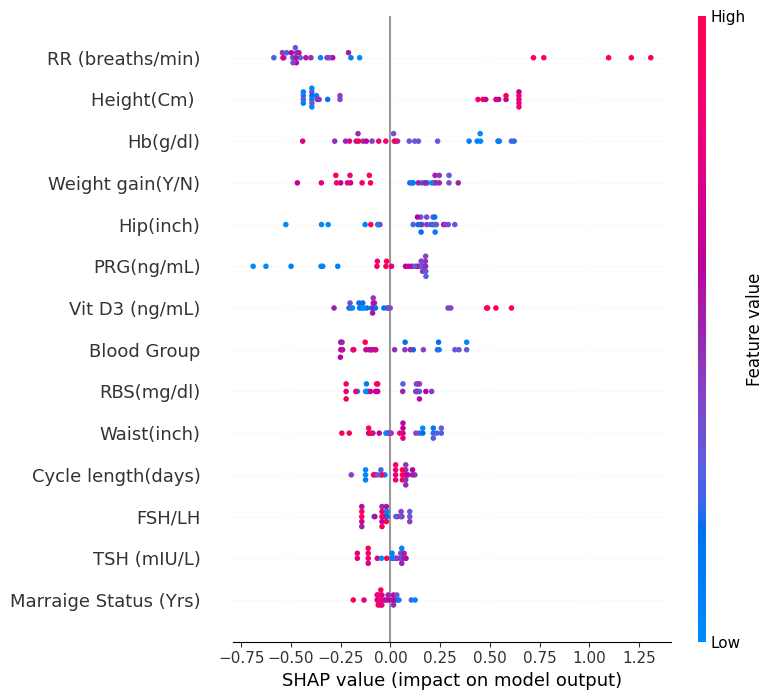

In [ ]:
# Explain the models' predictions using SHAP
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns[combined_selected_features][lasso_selected_features])

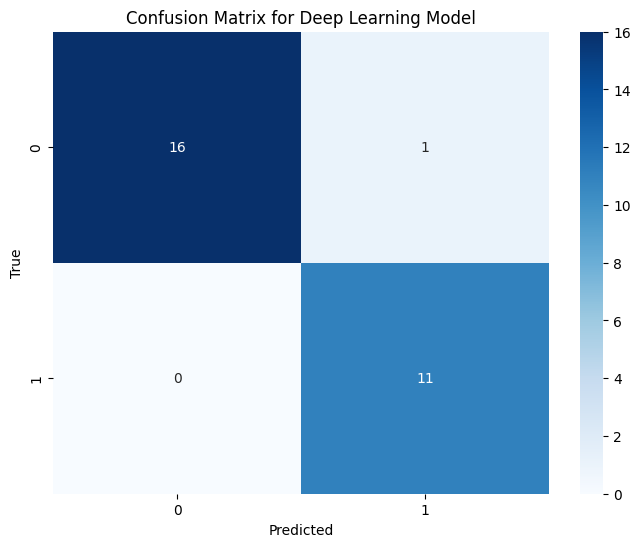

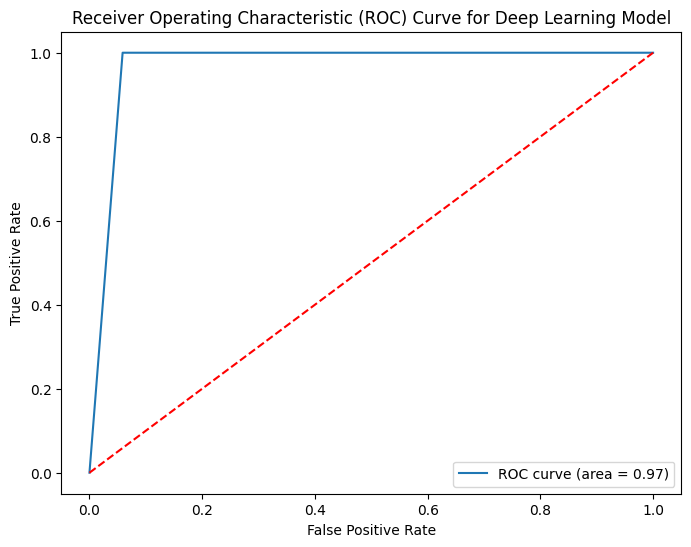

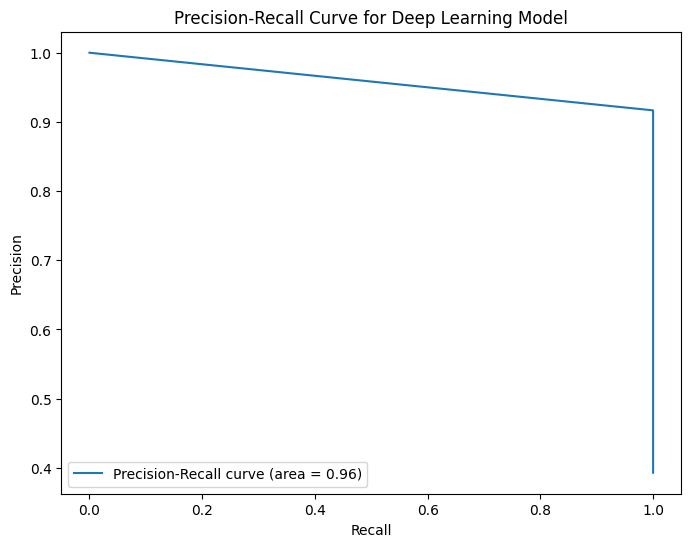

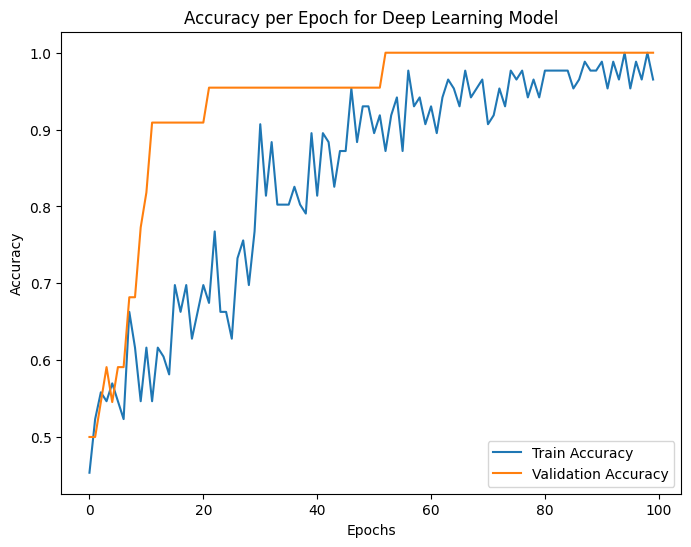

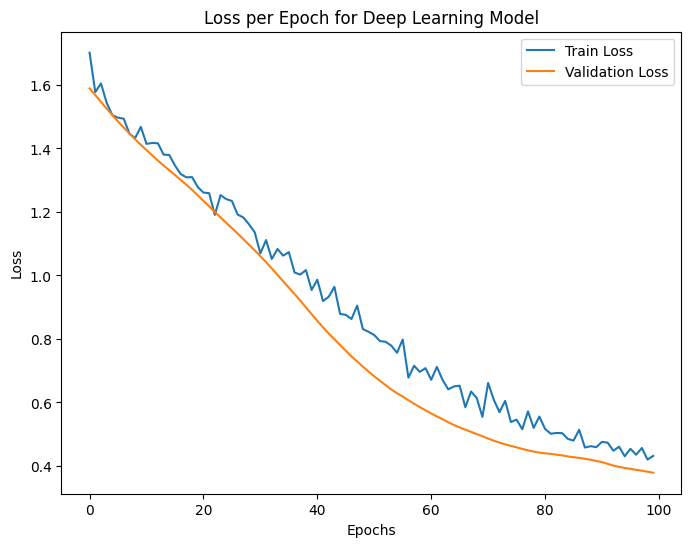

Classification Report for Deep Learning Model:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      1.00      0.96        11

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



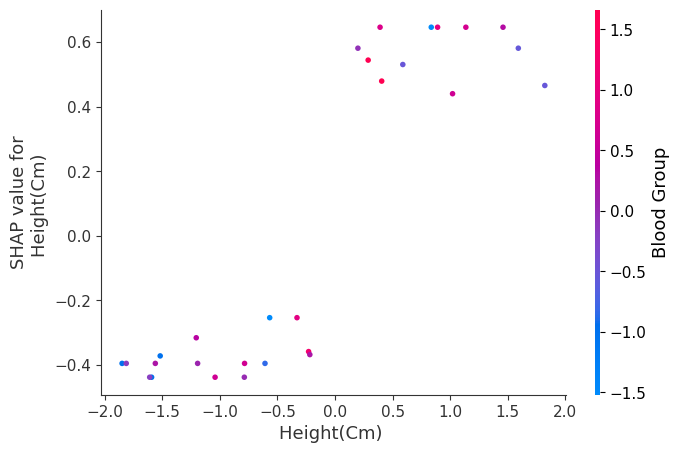

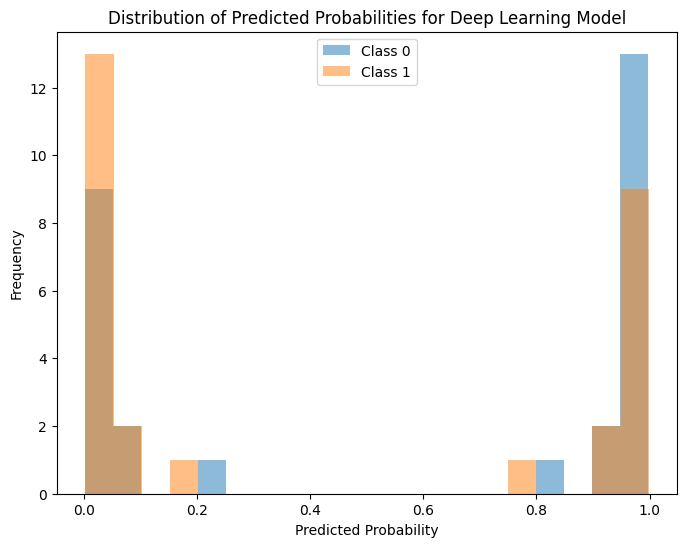

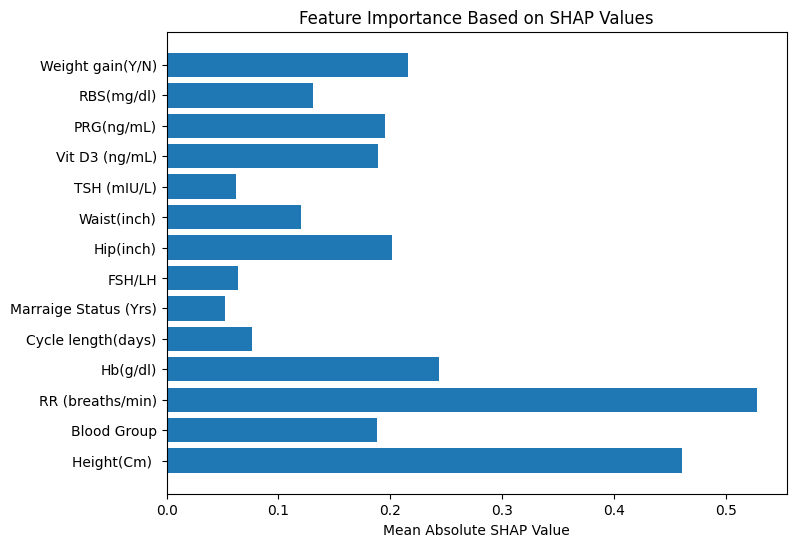

In [ ]:
# Import additional libraries for visualization
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_deep)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Deep Learning Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_deep)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_deep:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Deep Learning Model')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_deep)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {auc(recall, precision):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Deep Learning Model')
plt.legend(loc='lower left')
plt.show()

# Access the training history from KerasClassifier
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']

# Accuracy per Epoch
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch for Deep Learning Model')
plt.legend(loc='lower right')
plt.show()

# Loss per Epoch
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch for Deep Learning Model')
plt.legend(loc='upper right')
plt.show()



# Classification Report
print("Classification Report for Deep Learning Model:\n")
print(classification_report(y_test, y_pred_deep))

# # SHAP summary plot (already included, but recapping here as it is one of the visualizations)
# shap.summary_plot(shap_values, X_test, feature_names=X.columns[combined_selected_features][lasso_selected_features])

# # SHAP dependence plot for a single feature
# shap.dependence_plot(0, shap_values, X_test, feature_names=X.columns[combined_selected_features][lasso_selected_features])

# # SHAP interaction values (to visualize interactions between features)
# shap_interaction_values = shap.TreeExplainer(best_xgb_model).shap_interaction_values(X_test)
# shap.summary_plot(shap_interaction_values, X_test, feature_names=X.columns[combined_selected_features][lasso_selected_features])
# Convert SHAP values to numpy array
shap_values_array = shap_values.values

# SHAP dependence plot for a single feature (e.g., the first feature)
shap.dependence_plot(0, shap_values_array, X_test, feature_names=X.columns[combined_selected_features][lasso_selected_features])


# Distribution of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(deep_model.predict_proba(X_test)[:, 0], bins=20, alpha=0.5, label='Class 0')
plt.hist(deep_model.predict_proba(X_test)[:, 1], bins=20, alpha=0.5, label='Class 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Deep Learning Model')
plt.legend(loc='upper center')
plt.show()

# Convert SHAP values to numpy array
shap_values_array = shap_values.values

# Bar plot of feature importances (using SHAP values as a proxy for importance)
shap_importances = np.abs(shap_values_array).mean(axis=0)
plt.figure(figsize=(8, 6))
plt.barh(X.columns[combined_selected_features][lasso_selected_features], shap_importances)
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Based on SHAP Values')
plt.show()



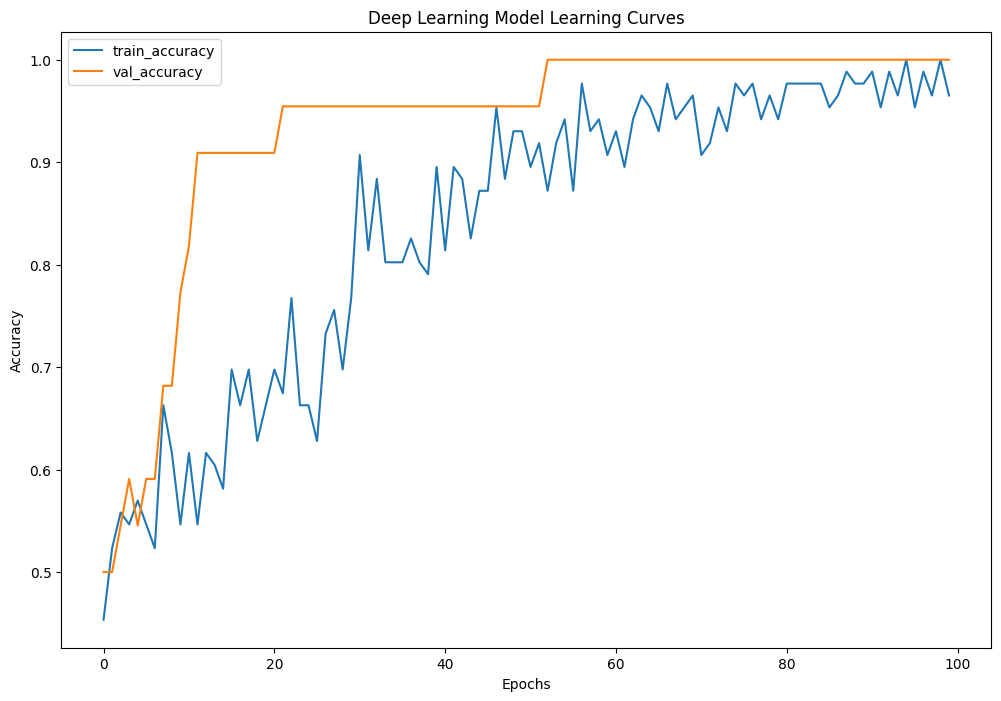

In [ ]:
plt.figure(figsize=(12, 8))
history = deep_model.history_
plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.title('Deep Learning Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

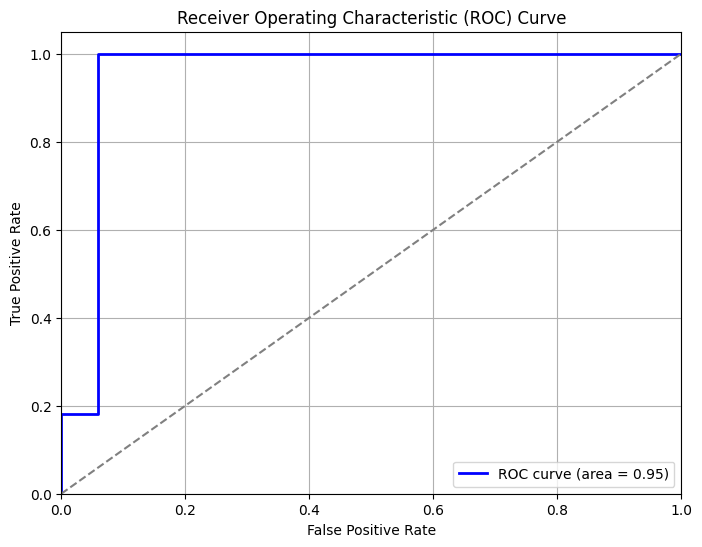

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_prob = deep_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()